In [1]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data.csv', DATA))
head(data)

lon,lat,etopo1,x,y,beetleAcres,host,forest,mStdAge,density,⋯,Jan20,PcumOctSep,SprsCosts,SprsAcres,SprsCPA,SprsFires,PctSprs,SprsAcre,SprsDays,OutDays
-124.2879,40.21671,201.27065,-1000000,-460000,NA,0,0,151.00000,27214.52,⋯,0,3704.248,275000,60,4583.333,NA,NA,NA,NA,NA
-124.3038,40.30570,179.37590,-1000000,-450000,NA,0,1,65.00000,31180.24,⋯,0,3634.644,NA,NA,NA,1,1,30.0,2,4
-124.3199,40.39468,323.83456,-1000000,-440000,NA,0,0,10.00000,48738.07,⋯,0,3577.369,NA,NA,NA,NA,NA,NA,NA,NA
-124.3360,40.48366,266.47128,-1000000,-430000,NA,0,1,74.00000,46378.85,⋯,0,3326.268,NA,NA,NA,NA,NA,NA,NA,NA
-124.3522,40.57263,30.87853,-1000000,-420000,NA,0,1,110.00000,13017.31,⋯,0,3122.938,NA,NA,NA,1,1,0.1,0,2
-124.1555,40.14040,296.74728,-990000,-470000,NA,1,1,53.63779,50787.85,⋯,0,3554.745,33900000,24882,1362.431,3,1,5762.0,12,84


In [2]:
drop <- c('x', 'y', 'SprsCosts', 'SprsAcres')
data <- data[, -which(names(data) %in% drop)]
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,PctLarge,PctOld,⋯,JanMin,TOctSep,Jan20,PcumOctSep,SprsCPA,SprsFires,PctSprs,SprsAcre,SprsDays,OutDays
-124.2879,40.21671,201.27065,NA,0,0,151.00000,27214.52,0.6827652,0.6666667,⋯,1.3934664,10.44481,0,3704.248,4583.333,NA,NA,NA,NA,NA
-124.3038,40.30570,179.37590,NA,0,1,65.00000,31180.24,0.3538462,0.2500000,⋯,1.3374767,10.67275,0,3634.644,NA,1,1,30.0,2,4
-124.3199,40.39468,323.83456,NA,0,0,10.00000,48738.07,0.7272727,0.6250000,⋯,1.2732506,10.41098,0,3577.369,NA,NA,NA,NA,NA,NA
-124.3360,40.48366,266.47128,NA,0,1,74.00000,46378.85,0.6931818,0.1250000,⋯,1.2720708,10.76958,0,3326.268,NA,NA,NA,NA,NA,NA
-124.3522,40.57263,30.87853,NA,0,1,110.00000,13017.31,0.7027027,0.0000000,⋯,1.3178075,11.26455,0,3122.938,NA,1,1,0.1,0,2
-124.1555,40.14040,296.74728,NA,1,1,53.63779,50787.85,0.3823529,0.0000000,⋯,0.8641355,10.39499,0,3554.745,1362.431,3,1,5762.0,12,84


In [3]:
summary(data$SprsCPA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   38.77  263.02     Inf 1326.39     Inf   31085 

In [4]:
sum(!(is.finite(data$SprsCPA)))

[1] 31122

In [5]:
names(data)

[1] "lon"         "lat"         "etopo1"      "beetleAcres" "host"       
 [6] "forest"      "mStdAge"     "density"     "PctLarge"    "PctOld"     
[11] "vcc"         "mfri"        "prs"         "pms"         "pls"        
[16] "GAP1"        "GAP2"        "GAP3"        "vpd"         "cwd"        
[21] "maxAugT"     "summerP0"    "Tmean"       "mi"          "Tvar"       
[26] "wd"          "AugTmean"    "OctTmin"     "AugMaxT"     "AugTmax"    
[31] "Acs"         "MarMin"      "ddAugJun"    "ddAugJul"    "JanTmin"    
[36] "PPT"         "summerP2"    "TMarAug"     "Mar20"       "fallTmean"  
[41] "MarTmin"     "maxT"        "Tmin"        "winterMin"   "summerTmean"
[46] "Pmean"       "summerP1"    "minT"        "JanMin"      "TOctSep"    
[51] "Jan20"       "PcumOctSep"  "SprsCPA"     "SprsFires"   "PctSprs"    
[56] "SprsAcre"    "SprsDays"    "OutDays"

In [6]:
data$vcc[data$vcc > 6] <- NA
data$prs[data$prs > 20] <- NA
data$pms[data$pms > 20] <- NA
data$pls[data$pls > 20] <- NA
data$mfri[data$mfri > 22] <- NA

In [7]:
dim(data)

[1] 36965    58

In [8]:
sum(complete.cases(data))

[1] 835

In [9]:
comp <- data[complete.cases(data), ]

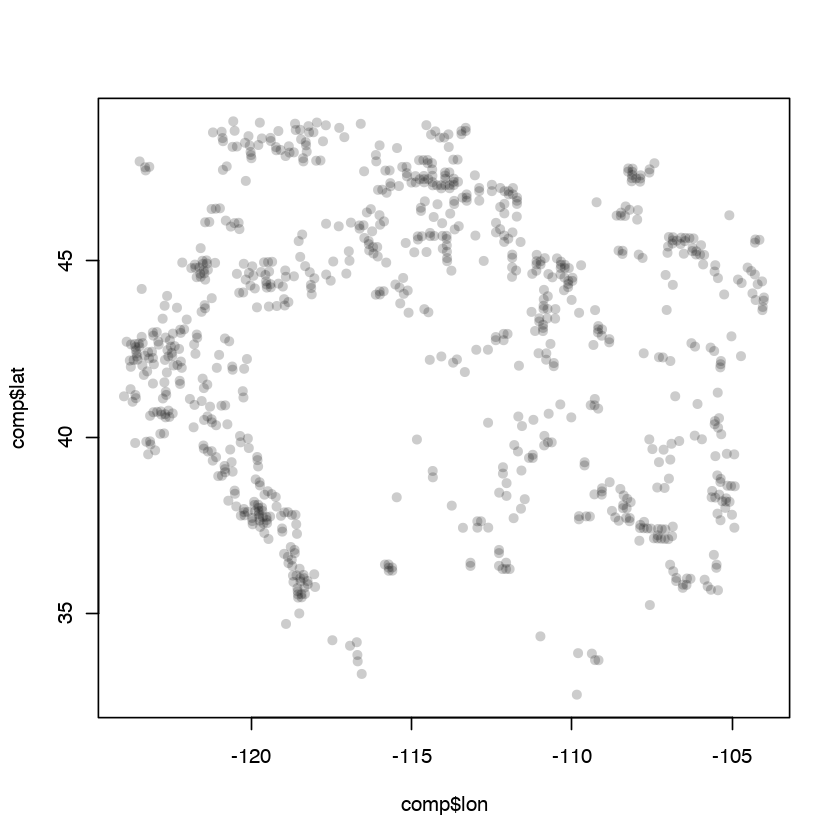

In [10]:
plot(comp$lon, comp$lat, pch=16, col=rgb(0, 0, 0, 0.2))

In [11]:
for (field in names(data)) {
  cat(sprintf('%20s: %d\n', field, sum(is.na(data[, field]))))
}

                 lon: 0
                 lat: 0
              etopo1: 0
         beetleAcres: 28011
                host: 0
              forest: 0
             mStdAge: 19542
             density: 290
            PctLarge: 19645
              PctOld: 25773
                 vcc: 7231
                mfri: 2652
                 prs: 1758
                 pms: 1740
                 pls: 1688
                GAP1: 0
                GAP2: 0
                GAP3: 0
                 vpd: 56
                 cwd: 56
             maxAugT: 56
            summerP0: 56
               Tmean: 56
                  mi: 56
                Tvar: 56
                  wd: 56
            AugTmean: 56
             OctTmin: 56
             AugMaxT: 56
             AugTmax: 56
                 Acs: 56
              MarMin: 56
            ddAugJun: 56
            ddAugJul: 56
             JanTmin: 56
                 PPT: 56
            summerP2: 56
             TMarAug: 56
               Mar20: 56
          

In [12]:
comp <- comp[is.finite(comp$SprsCPA), ]
dim(comp)
#indata <- subset(comp, beetleAcres > 0)

[1] 828  58

In [13]:
indata <- comp
#dim(indata)

[1] 828  58

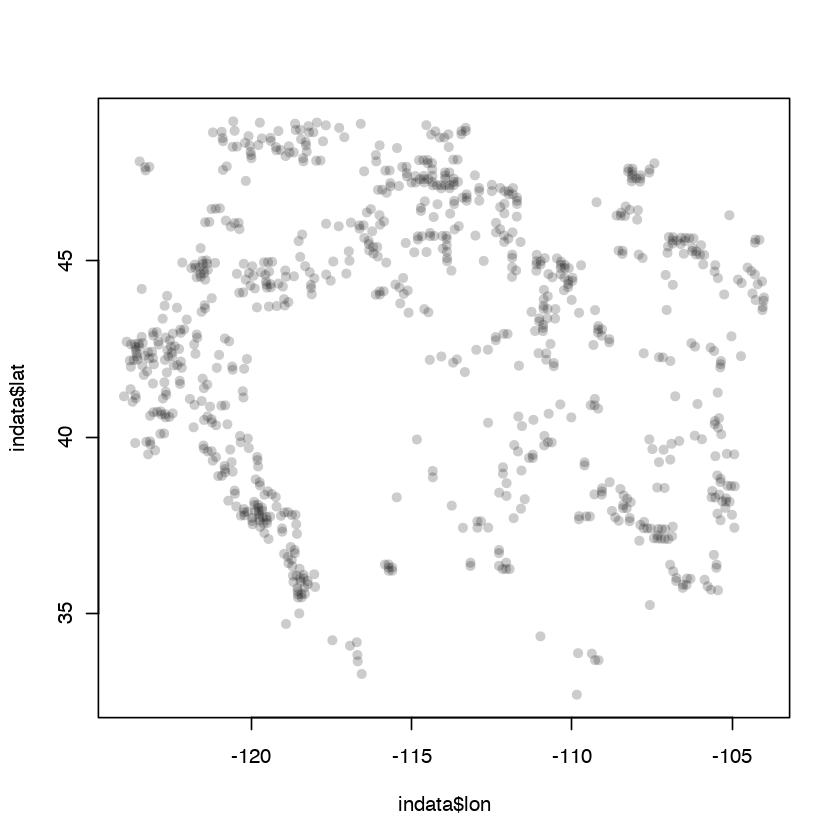

In [14]:
plot(indata$lon, indata$lat, pch=16, col=rgb(0, 0, 0, 0.2))

In [15]:
library(classInt)
library(RColorBrewer)

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`


In [16]:
nclr <- 8
plotclr <- brewer.pal(nclr,"YlOrRd")
plotvar <- indata$beetleAcres
class <- classIntervals(plotvar, nclr, style="kmeans")
colcode <- findColours(class, plotclr)

In [17]:
library(rgdal)

Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 


In [18]:
mpb10km_us_line <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km_us_line')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_us_line) <- mpb_projstr

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km_us_line"
with 17 features
It has 2 fields


In [19]:
lonlat <- CRS("+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")
mpb10km_us_line_lonlat <- spTransform(mpb10km_us_line, lonlat)

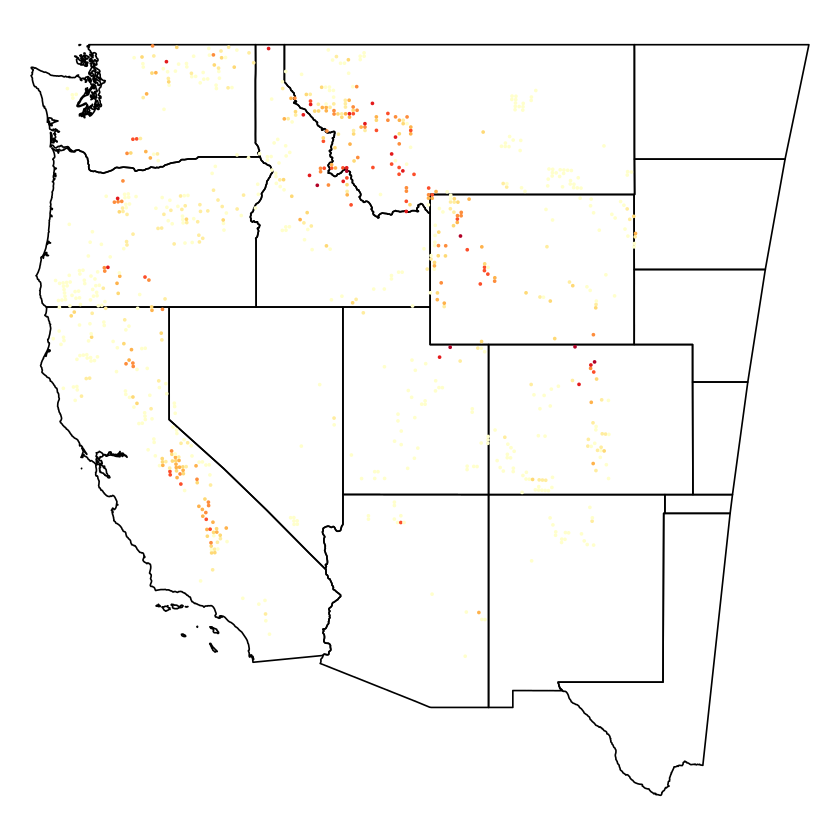

In [20]:
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_us_line_lonlat)
points(indata$lon, indata$lat, pch=16, col=colcode, cex=0.3)

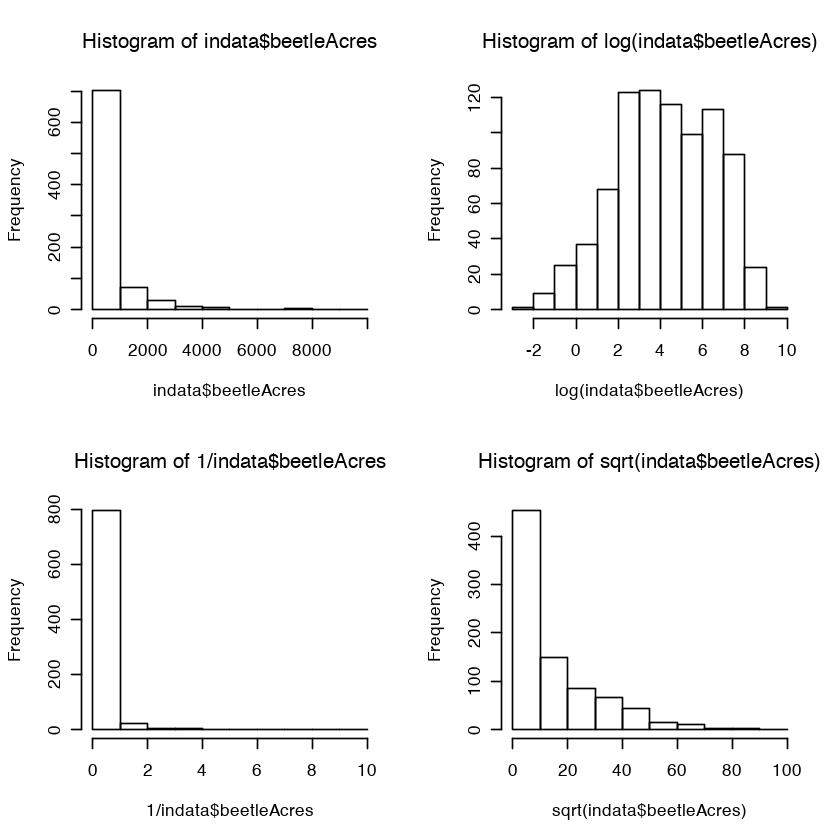

In [21]:
par(mfrow=c(2, 2))
hist(indata$beetleAcres)
hist(log(indata$beetleAcres))
hist(1 / indata$beetleAcres)
hist(sqrt(indata$beetleAcres))

In [22]:
summary(indata$SprsCPA)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0    282.1    830.8   3382.2   2716.3 492000.0 

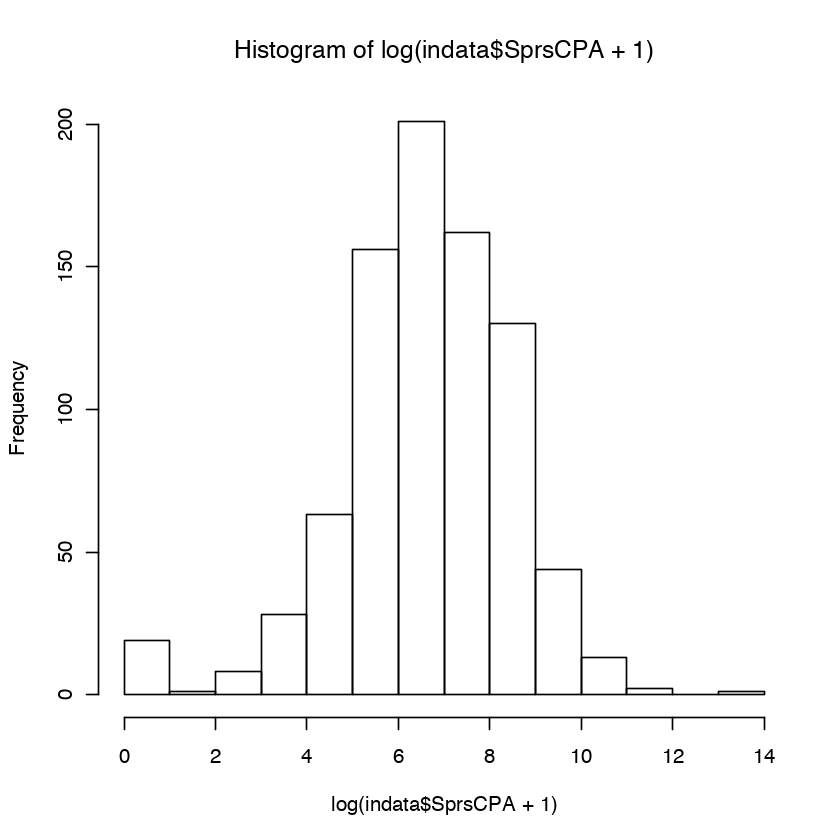

In [23]:
hist(log(indata$SprsCPA + 1))

In [24]:
indata$SprsCPA <- log(indata$SprsCPA + 1)
names(indata)[which(names(indata) == 'SprsCPA')] <- 'logSprsCPA.p1'

In [25]:
write.csv(indata, sprintf('%s/mpb10km_data_clean.csv', DATA), row.names=FALSE)